In [28]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np
import idx2numpy
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time

In [18]:
data = idx2numpy.convert_from_file("t10k-images.idx3-ubyte")
target = idx2numpy.convert_from_file("t10k-labels.idx1-ubyte")

In [19]:

print(data.shape, '\n',target.shape)
x = data.reshape(data.shape[0], -1)

(10000, 28, 28) 
 (10000,)


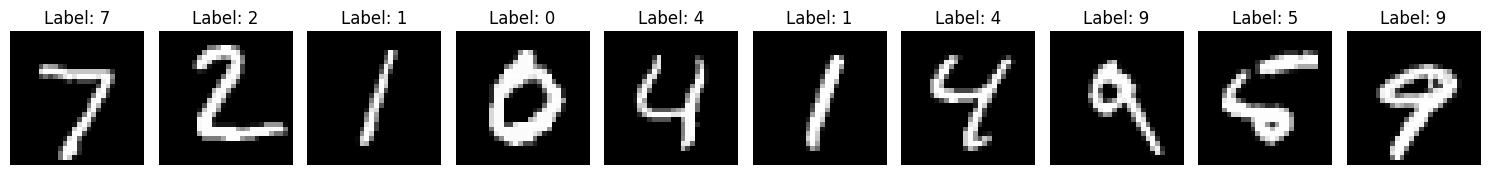

In [20]:
fig, axes = plt.subplots(1, 10, figsize=(15, 5))
for i in range(10):
    axes[i].imshow(data[i], cmap="gray")
    axes[i].set_title(f"Label: {target[i]}")
    axes[i].axis("off")
plt.tight_layout()
plt.show()


In [21]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, target, test_size=0.2, random_state=42)
print("Training set size:", x_train.shape[0])
print("Test set size:", x_test.shape[0])

Training set size: 8000
Test set size: 2000


In [23]:
clf = MLPClassifier(hidden_layer_sizes=(64,), max_iter=10, random_state=42)
clf.fit(x_train, y_train)


C:\Users\satvi\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(64,), max_iter=10, random_state=42)

In [24]:
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.94


In [25]:
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="weighted")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.9402735268677782
Recall: 0.94
F1 Score: 0.9398449754651409


C:\Users\satvi\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


0.1 0.935


C:\Users\satvi\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


0.25 0.9344


C:\Users\satvi\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


0.4 0.9295
0.2 0.94


C:\Users\satvi\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


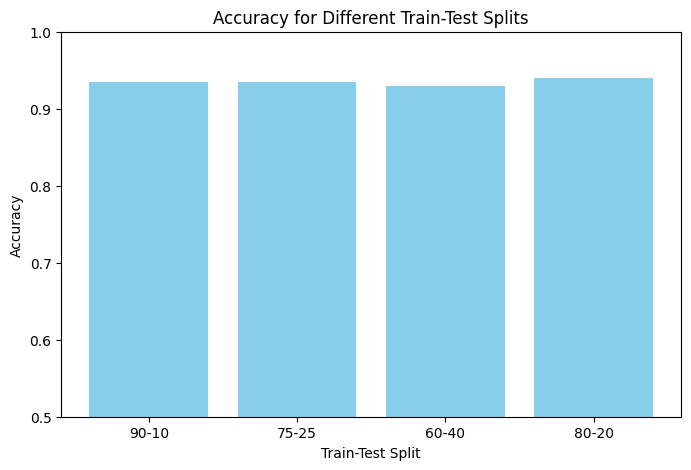

In [26]:
splits = [0.1, 0.25, 0.4, 0.2]  
accuracies = []
for test_size in splits:
    X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(x_scaled, target, test_size=test_size, random_state=42)
    clf = MLPClassifier(hidden_layer_sizes=(64,), max_iter=10, random_state=42)
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(test_size,acc)
    accuracies.append(acc)


plt.figure(figsize=(8, 5))
split_names = ["90-10", "75-25", "60-40", "80-20"]
plt.bar(split_names, accuracies, color="skyblue")
plt.title("Accuracy for Different Train-Test Splits")
plt.xlabel("Train-Test Split")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1)
plt.show()

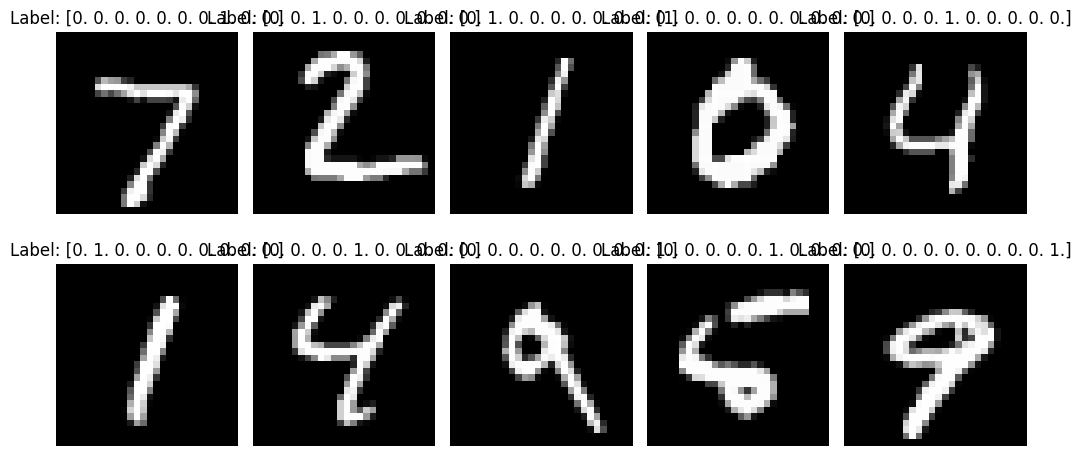

In [29]:
#PART - 2 
X = data / 255.0  
y = tf.keras.utils.to_categorical(target, 10)
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(data[i], cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def build_and_train_model(hidden_layers, nodes_per_layer, epochs, activation='relu', optimizer='adam', verbose=False):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))  # Input layer
    for _ in range(hidden_layers):
        model.add(Dense(nodes_per_layer, activation=activation))  # Hidden layers
    model.add(Dense(10, activation='softmax'))  # Output layer 
    
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    start_time = time.time()
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=verbose, validation_data=(X_test, y_test))
    training_time = time.time() - start_time
    
    train_acc = history.history['accuracy'][-1]
    test_acc = history.history['val_accuracy'][-1]
    total_params = model.count_params()
    
    return train_acc, test_acc, total_params, training_time, history

In [31]:
nodes = [4, 32, 64, 128, 512, 2056]
nodes_results = []
for n in nodes:
    train_acc, test_acc, params, training_time, _ = build_and_train_model(1, n, 10)
    nodes_results.append((n, train_acc, test_acc, params, training_time))
    print(f"Nodes: {n}, Train Acc: {train_acc:.2f}, Test Acc: {test_acc:.2f}, Params: {params}, Time: {training_time:.2f}s")

C:\Users\satvi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Nodes: 4, Train Acc: 0.82, Test Acc: 0.81, Params: 3190, Time: 4.75s
Nodes: 32, Train Acc: 0.97, Test Acc: 0.94, Params: 25450, Time: 4.34s
Nodes: 64, Train Acc: 0.98, Test Acc: 0.94, Params: 50890, Time: 4.82s
Nodes: 128, Train Acc: 1.00, Test Acc: 0.95, Params: 101770, Time: 5.45s
Nodes: 512, Train Acc: 1.00, Test Acc: 0.97, Params: 407050, Time: 7.57s
Nodes: 2056, Train Acc: 1.00, Test Acc: 0.97, Params: 1634530, Time: 19.01s


In [32]:
layers = [4, 5, 6, 8, 16]
layers_results = []
for l in layers:
    train_acc, test_acc, params, training_time, _ = build_and_train_model(l, 64, 10)
    layers_results.append((l, train_acc, test_acc, params, training_time))
    print(f"Layers: {l}, Train Acc: {train_acc:.2f}, Test Acc: {test_acc:.2f}, Params: {params}, Time: {training_time:.2f}s")

Layers: 4, Train Acc: 0.99, Test Acc: 0.94, Params: 63370, Time: 6.15s
Layers: 5, Train Acc: 0.99, Test Acc: 0.94, Params: 67530, Time: 6.87s
Layers: 6, Train Acc: 0.99, Test Acc: 0.93, Params: 71690, Time: 7.07s
Layers: 8, Train Acc: 0.98, Test Acc: 0.94, Params: 80010, Time: 7.83s
Layers: 16, Train Acc: 0.98, Test Acc: 0.93, Params: 113290, Time: 11.74s


In [33]:
activations = ['sigmoid', 'tanh', 'relu']
activation_results = []
for act in activations:
    train_acc, test_acc, params, training_time, _ = build_and_train_model(4, 64, 10, activation=act)
    activation_results.append((act, train_acc, test_acc, params, training_time))
    print(f"Activation: {act}, Train Acc: {train_acc:.2f}, Test Acc: {test_acc:.2f}, Params: {params}, Time: {training_time:.2f}s")


Activation: sigmoid, Train Acc: 0.97, Test Acc: 0.94, Params: 63370, Time: 6.39s
Activation: tanh, Train Acc: 1.00, Test Acc: 0.95, Params: 63370, Time: 6.33s
Activation: relu, Train Acc: 0.99, Test Acc: 0.95, Params: 63370, Time: 6.08s


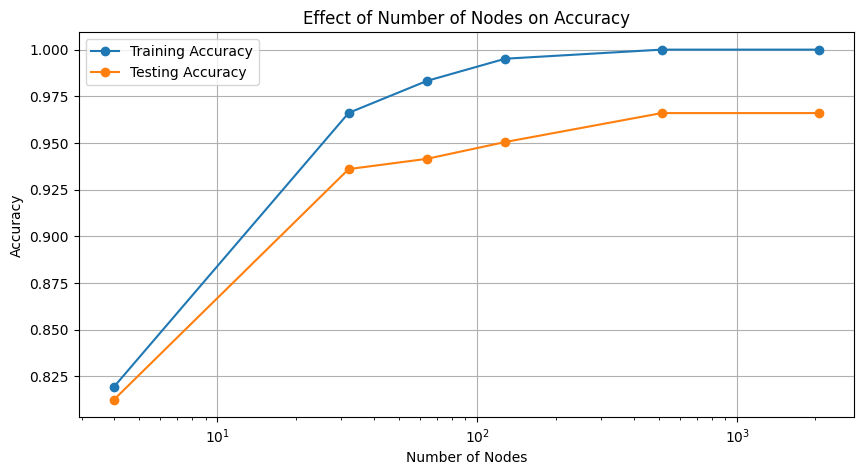

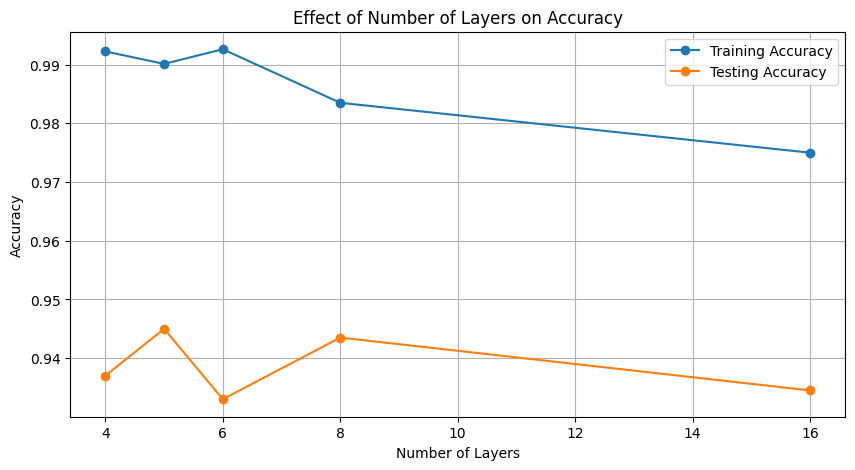

C:\Users\satvi\AppData\Local\Temp\ipykernel_32096\364897467.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


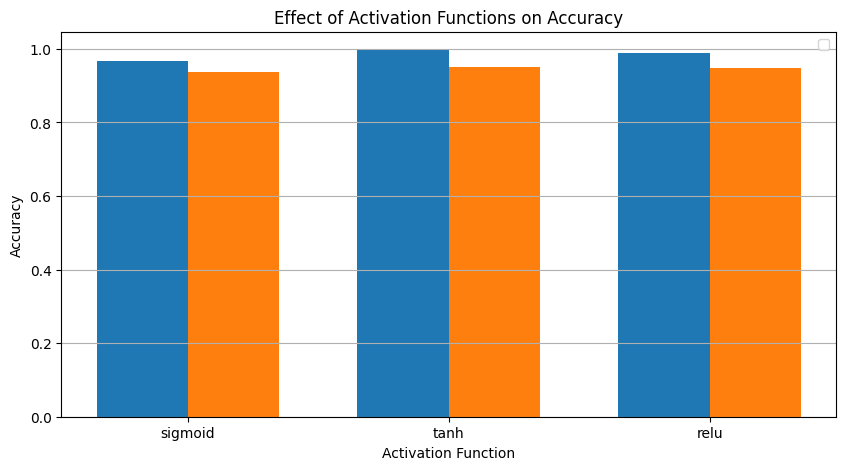

In [37]:
#node graph
nodes, train_acc, test_acc, params, training_time = zip(*nodes_results)
plt.figure(figsize=(10, 5))
plt.plot(nodes, train_acc, label='Training Accuracy', marker='o')
plt.plot(nodes, test_acc, label='Testing Accuracy', marker='o')
plt.title('Effect of Number of Nodes on Accuracy')
plt.xlabel('Number of Nodes')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.legend()
plt.grid()
plt.show()

#layer graph
layers, train_acc, test_acc, params, training_time = zip(*layers_results)
plt.figure(figsize=(10, 5))
plt.plot(layers, train_acc, label='Training Accuracy', marker='o')
plt.plot(layers, test_acc, label='Testing Accuracy', marker='o')
plt.title('Effect of Number of Layers on Accuracy')
plt.xlabel('Number of Layers')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

#activation function graph
activations, train_acc, test_acc, params, training_time = zip(*activation_results)
x = np.arange(len(activations))
width = 0.35

plt.figure(figsize=(10, 5))
plt.bar(x - width/2, train_acc, width)
plt.bar(x + width/2, test_acc, width)
plt.xticks(x, activations)
plt.title('Effect of Activation Functions on Accuracy')
plt.xlabel('Activation Function')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(axis='y')
plt.show()